In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import csv
import matplotlib.pyplot as plt
from sklearn import svm
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2"
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
# Format the current date as ISO format
today = pd.Timestamp("2021-11-17", tz="America/New_York").isoformat()

In [6]:
# Set the ticker for the S&P 500 ETF
market_etf_ticker = ["VOO"]

In [7]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [10]:
# Get current closing prices for above stocks
df_market_etf = alpaca.get_barset(
    market_etf_ticker,
    timeframe,
    start = today,
    end = today,
    limit = 500
).df

# Display sample data
# Auto formats in alphabetical order
df_market_etf

VOO                                 
                             open    high     low   close   volume
time                                                              
2021-11-17 00:00:00-05:00  431.24  431.39  429.84  430.42  3584267

In [13]:
# The farthest Alpaca will go back is 4 months for one pull
# Format start and end dates as ISO format
start = pd.Timestamp("2021-07-17", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-11-17", tz="America/New_York").isoformat()

In [16]:
# Get closing prices for chosen etf from start to end date of choice
df_market_etf_months = alpaca.get_barset(
    market_etf_ticker,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Display sample data
df_market_etf_months.head(10)

VOO                                    
                             open    high       low   close    volume
time                                                                 
2021-07-19 00:00:00-04:00  391.78  392.26  387.9300  390.69  11829986
2021-07-20 00:00:00-04:00  391.30  397.50  390.0100  396.24   3732567
2021-07-21 00:00:00-04:00  397.48  399.62  397.2700  399.50   2762597
2021-07-22 00:00:00-04:00  399.66  400.56  398.7000  400.41   2492286
2021-07-23 00:00:00-04:00  402.17  404.75  401.5800  404.30   3015590
2021-07-26 00:00:00-04:00  403.88  405.42  403.8200  405.35   2242464
2021-07-27 00:00:00-04:00  404.45  404.45  400.8000  403.57   3514924
2021-07-28 00:00:00-04:00  404.17  404.76  402.0400  403.42   3621222
2021-07-29 00:00:00-04:00  404.36  406.13  404.3500  405.10   2116896
2021-07-30 00:00:00-04:00  402.59  404.53  402.4697  403.12   4130769

In [17]:
# Clean the data and drop all columns except for closing
df_market_etf_months_clean = df_market_etf_months.drop(['open', 'high', 'low', 'volume'], axis=1, level=1)

# Display sample data
df_market_etf_months_clean.head(10)

,VOO
,close
time,
2021-07-19 00:00:00-04:00,390.69
2021-07-20 00:00:00-04:00,396.24
2021-07-21 00:00:00-04:00,399.50
2021-07-22 00:00:00-04:00,400.41
2021-07-23 00:00:00-04:00,404.30
2021-07-26 00:00:00-04:00,405.35
2021-07-27 00:00:00-04:00,403.57
2021-07-28 00:00:00-04:00,403.42


In [18]:
# Send to CSV file

df_market_etf_months_clean.to_csv('cleaned_market_etf_data.csv')

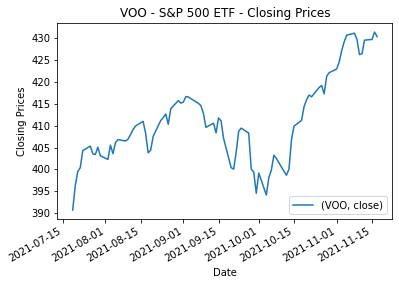

In [24]:
# Graph the market etf closing prices
# We are graphing the data to get a visualization over the market closing price performance

df_market_etf_months_clean.plot()
plt.title('VOO - S&P 500 ETF - Closing Prices')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.legend(loc="lower right", ncol=1)